# Eager Execution

Adapted from: https://www.tensorflow.org/get_started/eager

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train_dataset_fp = '../data/iris_training.csv'

In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


## Csv parser

In [5]:
def parse_csv(line):
    example_defaults = [[0.], [0.], [0.], [0.], [0]]
    parsed_line = tf.decode_csv(line, example_defaults)
    features = tf.reshape(parsed_line[:-1], shape=(4,))
    label = tf.reshape(parsed_line[-1], shape=())
    return features, label

## Dataset API

In [6]:
train_dataset = tf.data.TextLineDataset(train_dataset_fp)
train_dataset = train_dataset.skip(1)
train_dataset = train_dataset.map(parse_csv)
train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.batch(32)

In [7]:
train_dataset

<BatchDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [8]:
features, label = tfe.Iterator(train_dataset).next()

In [9]:
features

<tf.Tensor: id=41, shape=(32, 4), dtype=float32, numpy=
array([[5.1, 3.8, 1.9, 0.4],
       [5.4, 3.9, 1.7, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6.9, 3.1, 4.9, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [6.5, 3. , 5.2, 2. ],
       [5.6, 2.5, 3.9, 1.1],
       [6.5, 3.2, 5.1, 2. ],
       [5.7, 2.8, 4.1, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [7.7, 3. , 6.1, 2.3],
       [5.2, 3.5, 1.5, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 3.1, 4.4, 1.4],
       [6.9, 3.1, 5.1, 2.3],
       [6.9, 3.2, 5.7, 2.3],
       [6.6, 2.9, 4.6, 1.3],
       [7.2, 3.6, 6.1, 2.5],
       [4.6, 3.2, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3.1, 5.6, 2.4],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5. , 2. , 3.5, 1. ]], dtype=float32)>

In [10]:
label

<tf.Tensor: id=42, shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2,
       1, 2, 0, 0, 1, 1, 2, 0, 0, 1], dtype=int32)>

## Model

Note that the model is outputting the logits, not the softmax probabilities.

In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])

In [12]:
model

model behaves like a function:

In [13]:
model(features)

<tf.Tensor: id=128, shape=(32, 3), dtype=float32, numpy=
array([[ 0.3509653 , -0.6901543 , -0.5312936 ],
       [ 0.37027597, -0.69894475, -0.5254564 ],
       [ 0.32529962, -0.65533453, -0.5230988 ],
       [ 0.30054706, -0.5828816 , -0.4587801 ],
       [ 0.34620255, -0.6692615 , -0.5167723 ],
       [ 0.66383326, -0.96476066, -0.18249284],
       [ 0.6790738 , -0.9957315 , -0.26657072],
       [ 0.7122519 , -1.0275097 , -0.16877815],
       [ 0.6942888 , -1.0025206 , -0.12468516],
       [ 0.76960295, -1.1184478 , -0.25868678],
       [ 0.6888686 , -0.9952306 , -0.06023258],
       [ 0.7381606 , -1.0709777 , -0.1514027 ],
       [ 0.55324936, -0.7999539 , -0.15658435],
       [ 0.72798985, -1.0472342 , -0.14649901],
       [ 0.5834281 , -0.8400976 , -0.16421606],
       [ 0.7802255 , -1.1370046 , -0.15663636],
       [ 0.89457893, -1.3013806 , -0.11678386],
       [ 0.3532469 , -0.68461156, -0.53592575],
       [ 0.64437544, -0.935505  , -0.23242721],
       [ 0.62044716, -0.8702569

In eager mode we can access the values of the weights directly:

In [14]:
for i, v in enumerate(model.variables):
    print("Weight shape: ", v.shape)
    print("Weight tensor: ", v)
    print()


Weight shape:  (4, 10)
Weight tensor:  <tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
array([[-0.0666604 , -0.6421526 ,  0.34259224, -0.3948997 , -0.45712912,
        -0.3223892 ,  0.3070292 , -0.3845565 ,  0.4529785 , -0.02162164],
       [ 0.02600789, -0.16125071, -0.57985216, -0.5483285 , -0.05061054,
        -0.00438744,  0.10745579, -0.02783763,  0.05014807, -0.00355053],
       [ 0.61477375,  0.4192692 ,  0.00826001,  0.33067274, -0.40214407,
        -0.0568012 , -0.5032681 , -0.17845199, -0.4352657 ,  0.34095633],
       [-0.5953007 , -0.27772442,  0.42917633,  0.04444361,  0.54238164,
        -0.15590179,  0.01005054, -0.03355569,  0.16410744,  0.1747669 ]],
      dtype=float32)>

Weight shape:  (10,)
Weight tensor:  <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

Weight shape:  (10, 10)
Weight tensor:  <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[ 0.

## Loss

Loss is sparse categorical cross entropy

In [15]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

In [16]:
loss(model, features, label)

<tf.Tensor: id=193, shape=(), dtype=float32, numpy=1.3284055>

## Gradients

In eager mode we can evaluate the gradients

In [17]:
def grad(model, inputs, targets):
    with tfe.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

In [18]:
grads = grad(model, features, label)

In [19]:
for i, g in enumerate(grads):
    print("Gradient shape: ", g.shape)
    print("Gradient tensor: ", g)
    print()


Gradient shape:  (4, 10)
Gradient tensor:  tf.Tensor(
[[ 0.15521942  0.          0.08934666  0.          0.          0.
  -0.8066237   0.          0.08769638  1.1584948 ]
 [-0.01534925  0.          0.03665588  0.          0.          0.
  -0.36932454  0.         -0.02113988  0.5269268 ]
 [ 0.31399876  0.          0.030693    0.          0.          0.
  -0.5549314   0.          0.13079289  0.8746899 ]
 [ 0.14579803  0.         -0.00932144  0.          0.          0.
  -0.16414705  0.          0.03399986  0.30224282]], shape=(4, 10), dtype=float32)

Gradient shape:  (10,)
Gradient tensor:  tf.Tensor(
[ 0.00312087  0.          0.01981303  0.          0.          0.
 -0.13139562  0.          0.00905018  0.18586995], shape=(10,), dtype=float32)

Gradient shape:  (10, 10)
Gradient tensor:  tf.Tensor(
[[ 0.17515697  0.08807132 -0.03443405  0.          0.4275452   0.
  -0.01889303  0.06978258  0.39836735  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.     

## Optimizer

Let's use simple gradient descent

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

## Training Loop

In [21]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

# Loop over epochs
for epoch in range(num_epochs):
    
    # accumulators for mean loss and accuracy
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()

    # loop on dataset, for each batch:
    for x, y in tfe.Iterator(train_dataset):
        # Calculate gradients
        grads = grad(model, x, y)
        
        # Apply gradients to the weights
        optimizer.apply_gradients(zip(grads, model.variables),
                                  global_step=tf.train.get_or_create_global_step())

        # accumulate loss
        epoch_loss_avg(loss(model, x, y))
        
        # calculate predictions
        y_pred = tf.argmax(model(x), axis=1, output_type=tf.int32)
        # acccumulate accuracy
        epoch_accuracy(y_pred, y)

    # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 1.199, Accuracy: 35.000%
Epoch 050: Loss: 0.407, Accuracy: 85.000%
Epoch 100: Loss: 0.258, Accuracy: 94.167%
Epoch 150: Loss: 0.175, Accuracy: 97.500%
Epoch 200: Loss: 0.131, Accuracy: 98.333%


## Plot Metrics

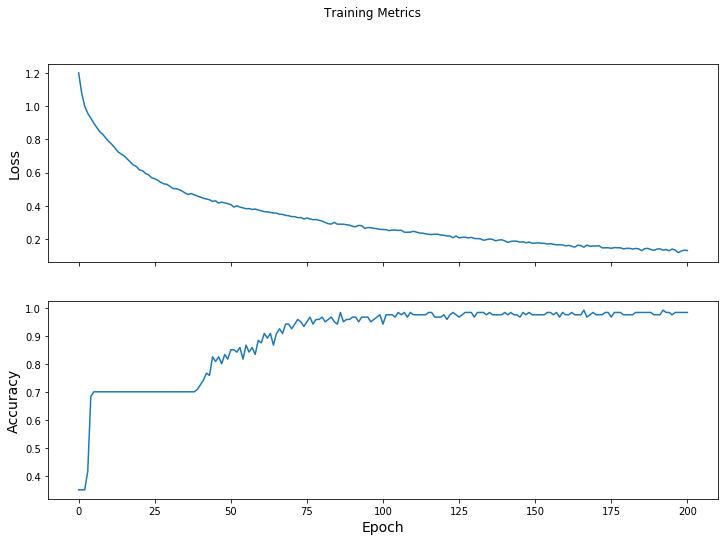

In [22]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

## Test

In [23]:
test_fp = '../data/iris_test.csv'

In [24]:
test_dataset = tf.data.TextLineDataset(test_fp)
test_dataset = test_dataset.skip(1)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(1000)       # randomize
test_dataset = test_dataset.batch(32)           # use the same batch size as the training set

In [25]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in tfe.Iterator(test_dataset):
    prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [26]:
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    name = class_ids[class_idx]
    print("Example {} prediction: {}".format(i, name))

Example 0 prediction: Iris setosa
Example 1 prediction: Iris versicolor
Example 2 prediction: Iris virginica
